# UFO Sightings
This file works with some data on UFO sightings. I would love to find out when the best time to go UFO watching and find some good places for it if possible.

In [1]:
import calendar
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Getting the data
The data was made availabkle in a csv format getting it in is pretty simple

In [2]:
df = pd.read_csv('complete.csv', header=0, low_memory=False)
df.drop(columns=['Unnamed: 11'], inplace=True) # an unnecessary column gets brought in
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Cleaning
The data looks alright so far but there are still a few things we can do to make it pretty

In [3]:
df['year_posted'] = df['date posted'].str.extract(r'(\d{4})$')
df['year'] = df['datetime'].str.extract(r'/(\d{4})').astype(int)
# changing country abbreviations to full names
df['country'] = df['country'].str.replace(r'us', 'United States')
df['country'] = df['country'].str.replace(r'ca', 'Canada')
df['country'] = df['country'].str.replace(r'gb', 'Great Britain')
df['country'] = df['country'].str.replace(r'au', 'Australia')
df['country'] = df['country'].str.replace(r'de', 'Denmark')
# getting the time of day
df['hour'] = df['datetime'].str.extract(r'(\d+):\d+', expand=False).astype(int)
# getting the month
df['month'] = df['datetime'].str.extract(r'^(\d+)', expand=False).astype(int)
# converting code for commas to commas
df['comments'] = df['comments'].str.replace(r'&#44', ',')
# scaling the data
df['duration (seconds)'] = df['duration (seconds)'].str.replace(r'\.\d+$|\W', '').fillna(False).astype(int)
df['state'] = df['state'].str.upper()
df['city'] = df['city'].str.title()
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year_posted,year,hour,month
0,10/10/1949 20:30,San Marcos,TX,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,2004,1949,20,10
1,10/10/1949 21:00,Lackland Afb,TX,NaN,light,7200,1-2 hrs,"1949 Lackland AFB, TX. Lights racing across t...",12/16/2005,29.38421,-98.581082,2005,1949,21,10
2,10/10/1955 17:00,Chester (Uk/England),NaN,Great Britain,circle,20,20 seconds,"Green/Orange circular disc over Chester, England",1/21/2008,53.2,-2.916667,2008,1955,17,10
3,10/10/1956 21:00,Edna,TX,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,2004,1956,21,10
4,10/10/1960 20:00,Kaneohe,HI,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,2004,1960,20,10


# Visualization
Now that the data is cleaner, let's do some visualization with it

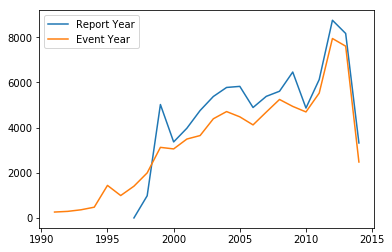

In [4]:
amount_posted = df['year_posted'].fillna(False).astype(int).value_counts().sort_index()
amount_reported = df['year'].astype(int).value_counts().sort_index()
x1 = [x for x in amount_posted.index if x > 0] # removing the data that doesn't help like missing and 0 valued
y1 = [amount_posted[x] for x in amount_posted.index if x > 0]
x2 = [x for x in amount_reported.index if x > 0]
y2 = [amount_reported[x] for x in amount_reported.index if x > 0]
plt.plot(x1, y1)
plt.plot([x for x in x2 if x > 1990], [y for x, y in zip(x2, y2) if x > 1990])
plt.legend(labels=('Report Year', 'Event Year'))

We see that the trends of reporting and viewing them is pretty consistent since 2000, let's look at a regression line of each and see how they compare.

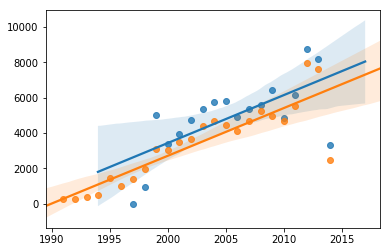

In [5]:
sns.regplot(x1,y1)
sns.regplot([x for x in x2 if x > 1990], [y for x, y in zip(x2, y2) if x > 1990])

The slopes appear to be very comparable. There are a few more reports than sightings but that makes sense as there are many events reported prior to the data being compiled. This gives me some confidence that these reports are at least somewhat representative of how many sightings that there actually are.

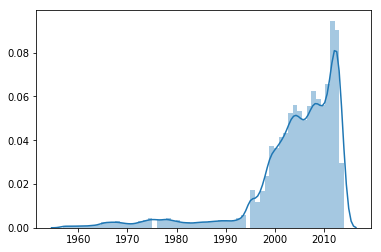

In [6]:
sns.distplot([x for x in df['year']if x > 1956], bins = 60)

There seems to have been a spike around 2012. It will be hard to say whether this is from more people were reporting the sightings or more extra-terrestrial visitations.  
I don't want to have to travel to another country to see UFOs so let's look at which states would be the place to go if I want to go UFO watching. Hopefully I didn't miss the boat with such a large drop off that we saw.

Text(0.5,0,'State')

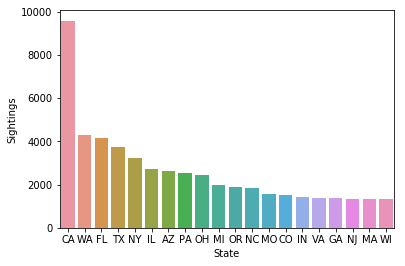

In [7]:
df_us = df[df['country'] == 'United States']
# only doing the top 20 states to keep it neater
sns.barplot(df_us['state'].value_counts().index[:20], df_us['state'].value_counts()[:20])
plt.ylabel('Sightings')
plt.xlabel('State')

So California is the place to be to find UFOs but there is also a large population there so that may be skewing the results a bit. For now, let's go with it and see what time of year and what time of day would be best.

Text(0.5,0,'Month')

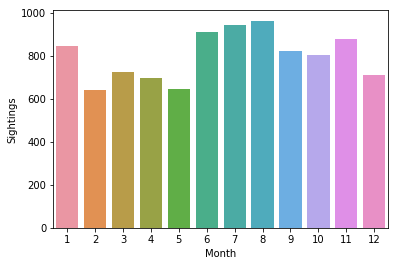

In [8]:
df_cal = df_us[df_us['state'] == 'CA']
plt.xticks = [x for x in range(1, 13)]
sns.barplot(df_cal['month'].value_counts().index, df_cal['month'].value_counts())
plt.ylabel('Sightings')
plt.xlabel('Month')

So, the time of year doesn't appear to be super significant in it but going during the summer months is probably the best bet even if other months don't have a huge drop off.

Text(0.5,0,'Time of Day')

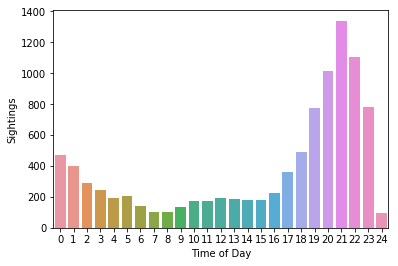

In [9]:
df_cal = df_us[df_us['state'] == 'CA']
plt.xticks = [x for x in range(1, 13)]
sns.barplot(df_cal['hour'].value_counts().index, df_cal['hour'].value_counts())
plt.ylabel('Sightings')
plt.xlabel('Time of Day')

So, it looks like most of the happenings are right around dusk. A wise man told me an possible explanation for this. There is sometimes a green flash at sunset so maybe that is what people are seeing many of these times.
https://en.wikipedia.org/wiki/Green_flash

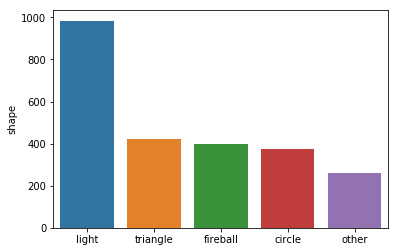

In [10]:
df_sunset = df_cal[df_cal['hour'] > 18]
df_sunset = df_sunset[df_sunset['hour'] < 23]
# just look at the top 5 shapes
sns.barplot(df_sunset['shape'].value_counts().index[:5], df_sunset['shape'].value_counts()[:5])

So maybe the people reporting these things don't know that the Green flash is a well documented event. We can look in the comments for the presence of something green in each of the most common types

In [11]:
for shape in df_sunset['shape'].value_counts().index[:5]:
    df_shape = df_cal[df_cal['shape'] == shape]
    print(shape, f": {df_shape['comments'].str.match(r'[Gg]reen').sum()}")

light : 12
triangle : 0
fireball : 19
circle : 3
other : 3


So it looks like that doesn't account for a large number of the UFO sightings so we can probably say definitively that the people that reported these all saw real extra-terrestrial ships that have malicious intentions with the human race. Also, I think they got here by travelling through an interdimensional portal in the center of the sun.